<a href="https://colab.research.google.com/github/pnistha11/Data-Analysis-Projects/blob/main/Instagram_fake_spammer_genuine_accounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instagram fake spammer genuine accounts**
Objectives of the Project
The primary objectives of this project are:
* To analyze characteristics of fake vs genuine Instagram accounts
* To perform Exploratory Data Analysis (EDA) on social media profile data
* To engineer meaningful features that improve classification accuracy
* To build and compare machine learning classification models
* To identify the most important features contributing to fake account detection
* To achieve high prediction accuracy on unseen test data

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/sizlingdhairya1/instagram-fake-genuine-accounts")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nisthapatel11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sizlingdhairya1/instagram-fake-genuine-accounts


100%|██████████| 26.3k/26.3k [00:00<00:00, 58.4MB/s]

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Settings
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
#load dataset
train_df = pd.read_csv("/content/instagram-fake-genuine-accounts/train.csv")
test_df  = pd.read_csv("/content/instagram-fake-genuine-accounts/test.csv")

print(train_df.shape, test_df.shape)
print(train_df.head())

(576, 12) (120, 12)
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740 

In [ ]:
train_df.info()
train_df.describe()
train_df.isnull().sum()
train_df['fake'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


,count
fake,
0,288
1,288


## **Exploratory Data Analysis (EDA)**

## *Target Distribution*

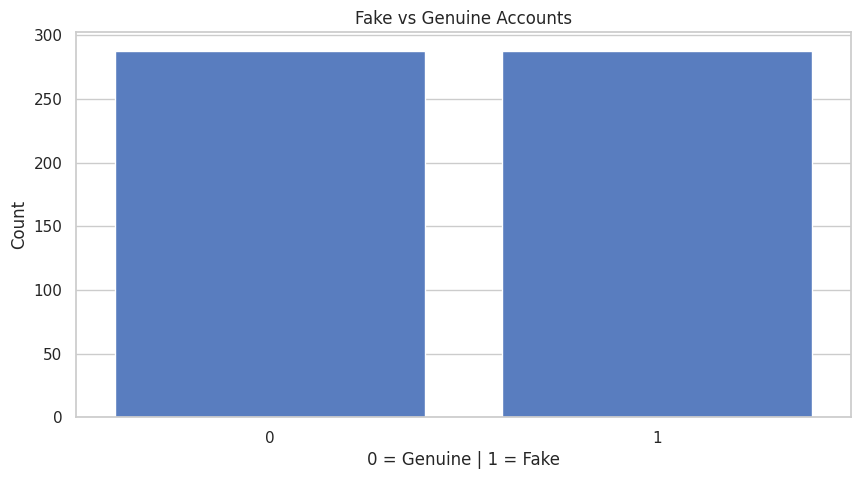

In [ ]:
sns.countplot(x='fake', data=train_df)
plt.title("Fake vs Genuine Accounts")
plt.xlabel("0 = Genuine | 1 = Fake")
plt.ylabel("Count")
plt.show()

# *Followers vs Account Type*

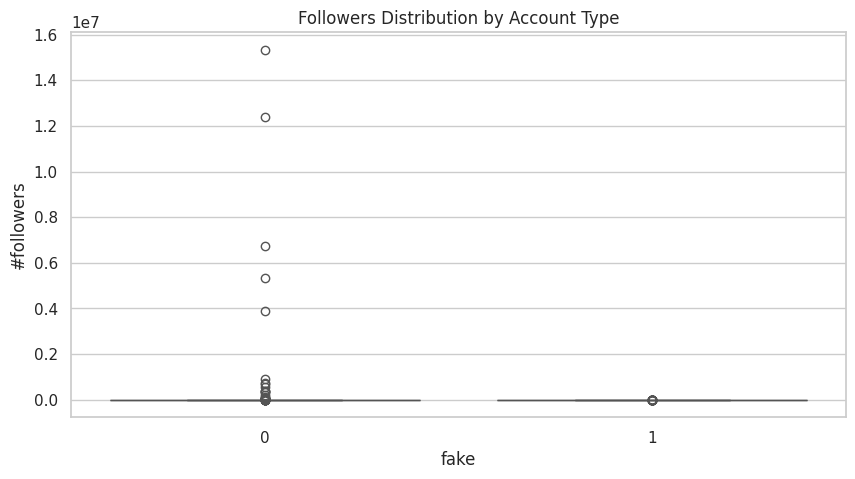

In [ ]:
sns.boxplot(x='fake', y='#followers', data=train_df)
plt.title("Followers Distribution by Account Type")
plt.show()

# *Profile Picture Impact*

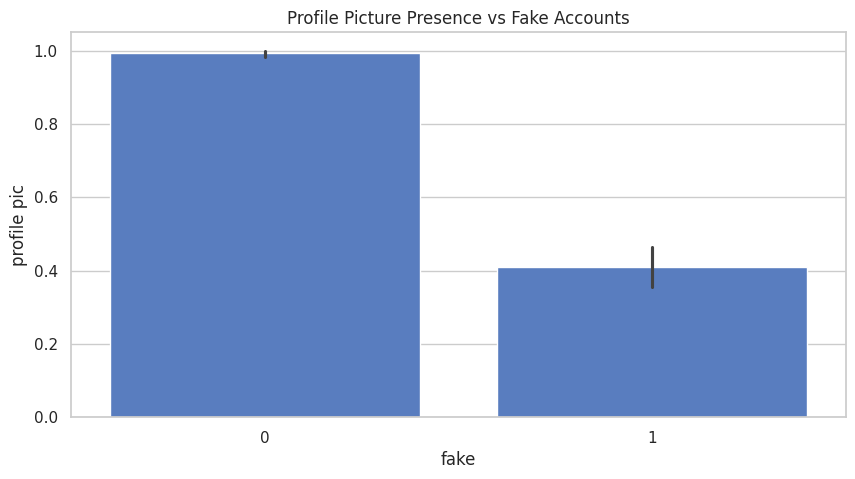

In [ ]:
sns.barplot(x='fake', y='profile pic', data=train_df)
plt.title("Profile Picture Presence vs Fake Accounts")
plt.show()

# Feature Engineering

In [ ]:
train_df['follower_following_ratio'] = train_df['#followers'] / (train_df['#follows'] + 1)
test_df['follower_following_ratio'] = test_df['#followers'] / (test_df['#follows'] + 1)

## **Feature–Target Split**

In [ ]:
X = train_df.drop('fake', axis=1)
y = train_df['fake']

X_test_final = test_df.drop('fake', axis=1)
y_test_final = test_df['fake']

## **Feature Scaling**

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

## **Train–Validation Split**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

**Model 1 – Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_val_pred_lr = lr.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print(classification_report(y_val, y_val_pred_lr))

Logistic Regression Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.93      0.75      0.83        53

    accuracy                           0.86       116
   macro avg       0.88      0.85      0.86       116
weighted avg       0.87      0.86      0.86       116



**Model 2 – Random Forest**

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=300, random_state=42)

## Validation Performance

In [ ]:
y_val_pred = rf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9137931034482759
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        63
           1       0.91      0.91      0.91        53

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.91      0.91      0.91       116



**Confusion Matrix**

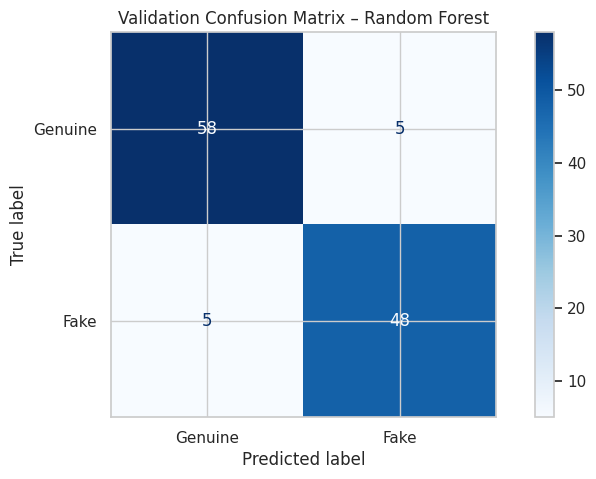

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_val, y_val_pred,
    display_labels=["Genuine", "Fake"],
    cmap="Blues"
)
plt.title("Validation Confusion Matrix – Random Forest")
plt.show()

## **Final Test Evaluation**

In [ ]:
y_test_pred = rf.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test_final, y_test_pred))
print(classification_report(y_test_final, y_test_pred))

Test Accuracy: 0.9416666666666667
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.92      0.97      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



**Feature Importance**

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
9,#followers,0.259426
8,#posts,0.192866
1,nums/length username,0.121500
0,profile pic,0.116126
11,follower_following_ratio,0.110320
5,description length,0.085098
10,#follows,0.066911
2,fullname words,0.028650
7,private,0.008197
3,nums/length fullname,0.005014


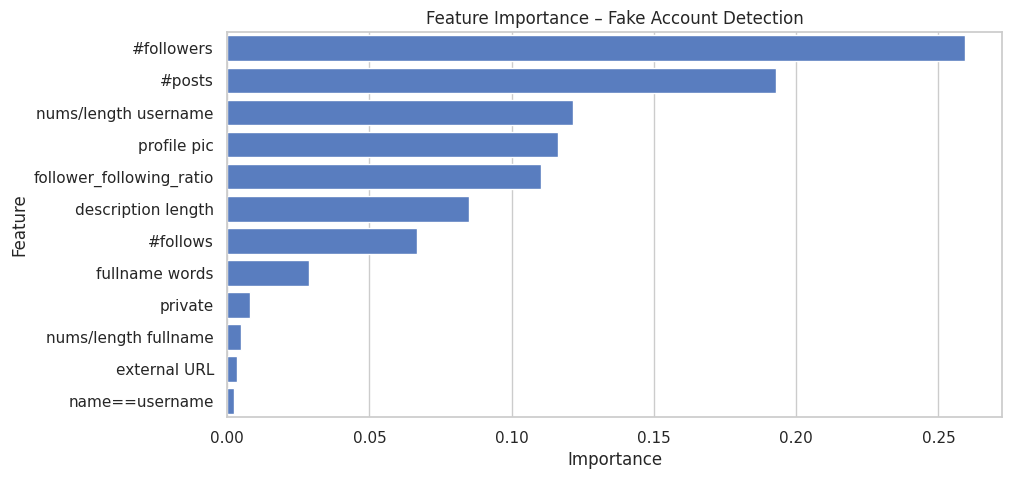

In [ ]:
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance
)
plt.title("Feature Importance – Fake Account Detection")
plt.show()

In [ ]:
test_output = test_df.copy()
test_output['Predicted_fake'] = y_test_pred

test_output.to_csv("tableau_test_output.csv", index=False)
feature_importance.to_csv("tableau_feature_importance.csv", index=False)